# Explore here

In [10]:
# Your code here
import pandas as pd
import requests

# URL del archivo CSV
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"

# Hacer una solicitud GET para obtener el archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código 200)
if response.status_code == 200:
    # Guardar el contenido del archivo en la carpeta data/raw
    with open("/workspaces/Regresion_lineal_JesusCastanedam/data/raw/medical_insurance_cost.csv", "wb") as f:
        f.write(response.content)
else:
    print("Error al descargar el archivo:", response.status_code)

In [21]:
df = pd.read_csv(url)
df.head(10)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [13]:
#Tamano
print("El tamano es de:", df.shape)


El tamano es de: (1338, 7)


In [14]:
# Info 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [15]:

#Descripcion con 2 decimales
print(round(df.describe(),2))

           age      bmi  children   charges
count  1338.00  1338.00   1338.00   1338.00
mean     39.21    30.66      1.09  13270.42
std      14.05     6.10      1.21  12110.01
min      18.00    15.96      0.00   1121.87
25%      27.00    26.30      0.00   4740.29
50%      39.00    30.40      1.00   9382.03
75%      51.00    34.69      2.00  16639.91
max      64.00    53.13      5.00  63770.43


In [17]:

# Nulos en porcentaje
df.isnull().sum().sort_values(ascending=False) 



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
# Duplicados
df.duplicated().sum()

np.int64(1)

In [20]:

# Ver cuántos duplicados hay por cada fila
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


### Análisis Categorico

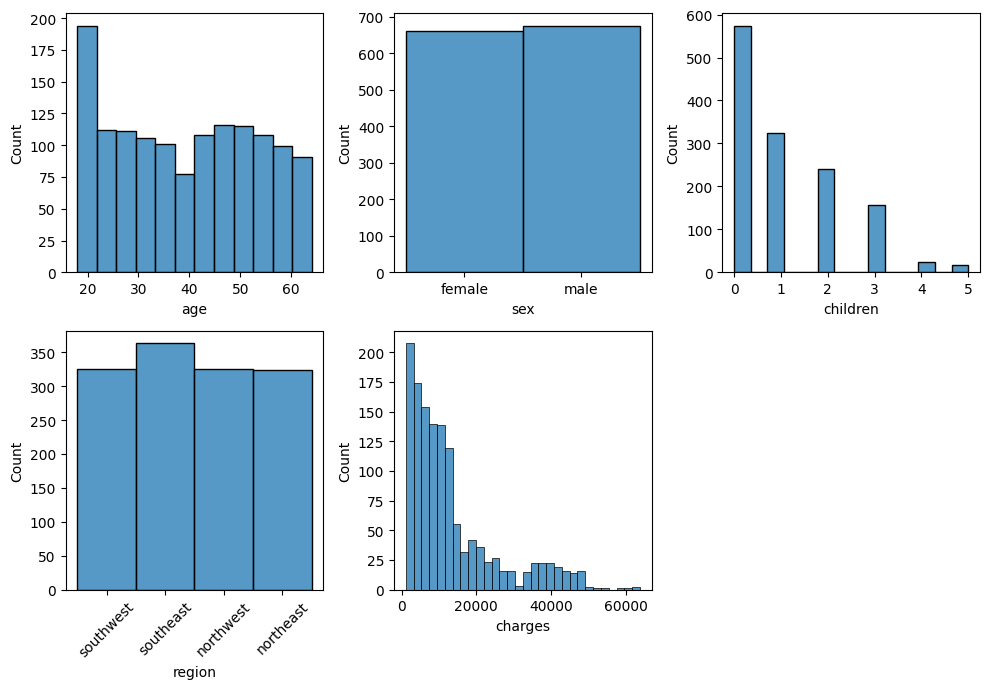

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = df, x = "age")
sns.histplot(ax = axis[0, 1], data = df, x = "sex")
sns.histplot(ax = axis[0, 2], data = df, x = "children")
sns.histplot(ax = axis[1, 0], data = df, x = "region").tick_params(axis='x', rotation=45)
sns.histplot(ax = axis[1, 1], data = df, x = "charges")
fig.delaxes(axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


### Análisis Númerico

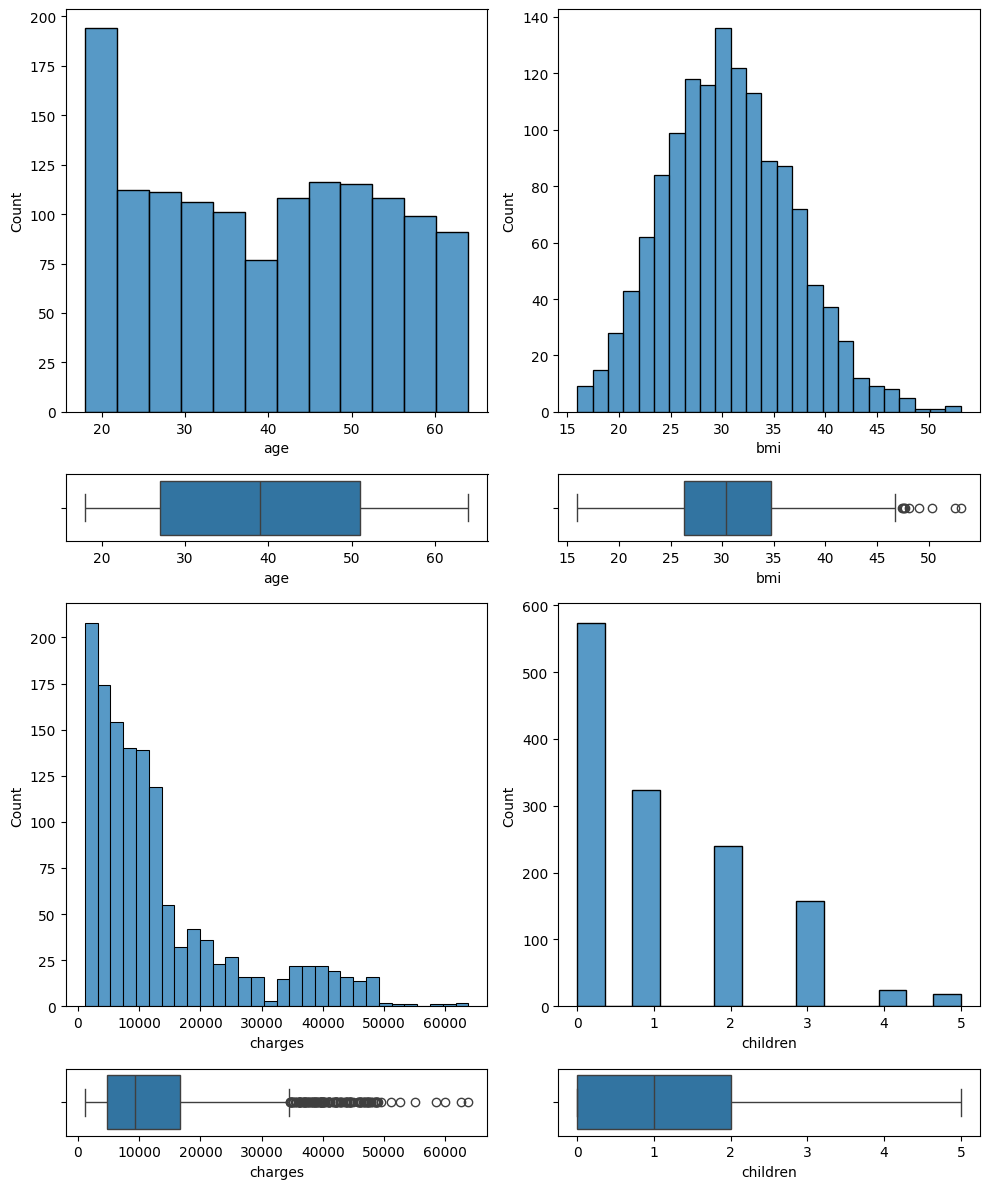

In [32]:
fig, axis = plt.subplots(4, 2, figsize = (10, 12), gridspec_kw={"height_ratios": [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja

sns.histplot(ax = axis[0, 0], data = df, x = "age")#.set_xlim(0,2000) # Se ha limitado para poder visualizarlo mejor.
sns.boxplot(ax = axis[1, 0], data = df, x = "age")


sns.histplot(ax = axis[0, 1], data = df, x = "bmi")#.set_xlim(0,200)# Se ha limitado para poder visualizarlo mejor.
sns.boxplot(ax = axis[1, 1], data = df, x = "bmi")


sns.histplot(ax = axis[2, 0], data = df, x = "charges")
sns.boxplot(ax = axis[3, 0], data = df, x = "charges")


sns.histplot(ax = axis[2, 1], data = df, x = "children")#.set_xlim(0,60)# Se ha limitado para poder visualizarlo mejor.
sns.boxplot(ax = axis[3, 1], data = df, x = "children")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

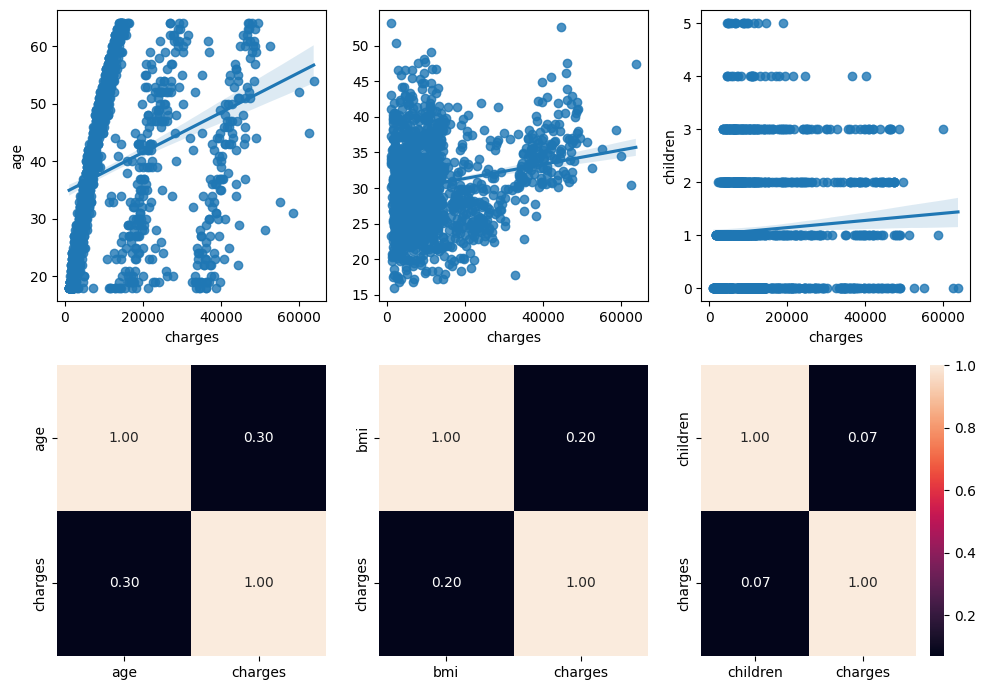

In [45]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "charges", y = "age")
sns.heatmap(df[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "charges", y = "bmi").set(ylabel=None)
sns.heatmap(df[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[0, 2], data = df, x = "charges", y = "children")
sns.heatmap(df[["children", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()